#Predicting the items bought using the ecommerce dataset

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [2]:


# Load the dataset
df = pd.read_csv('Us-Ecommerce Dataset.csv')


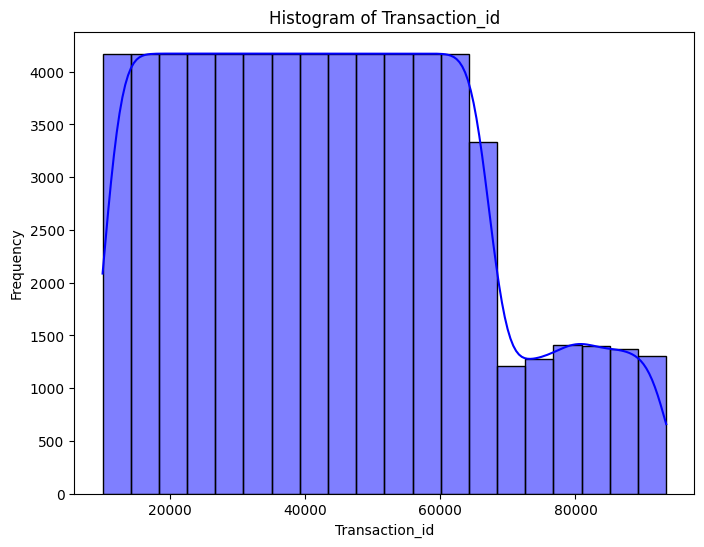

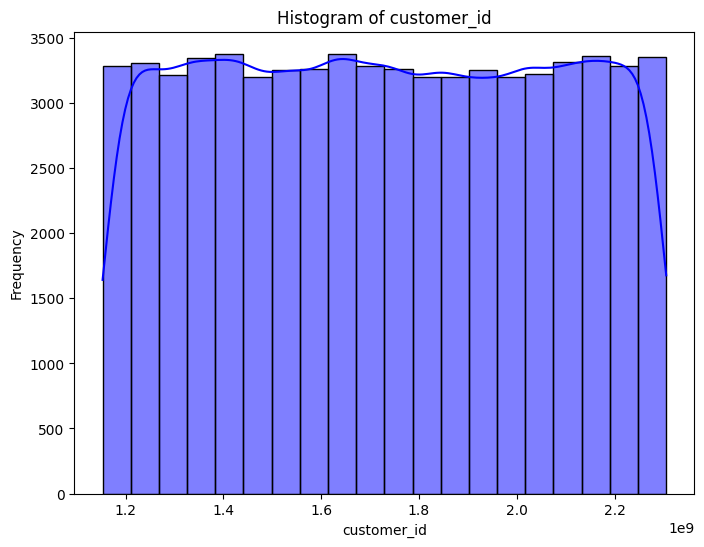

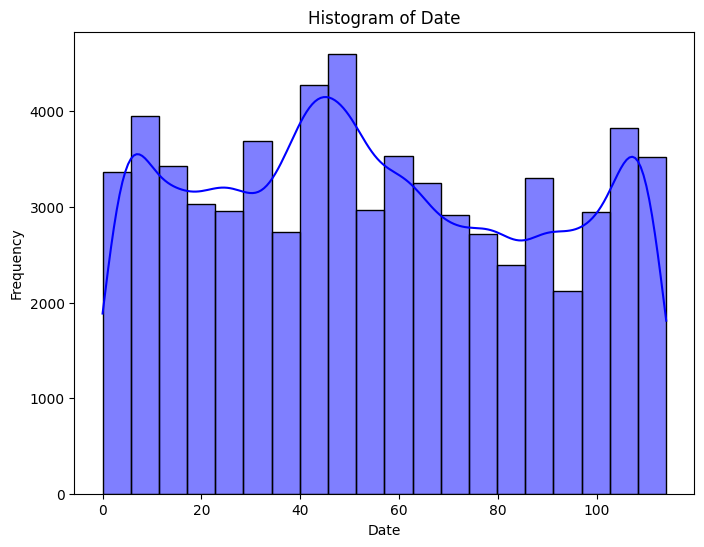

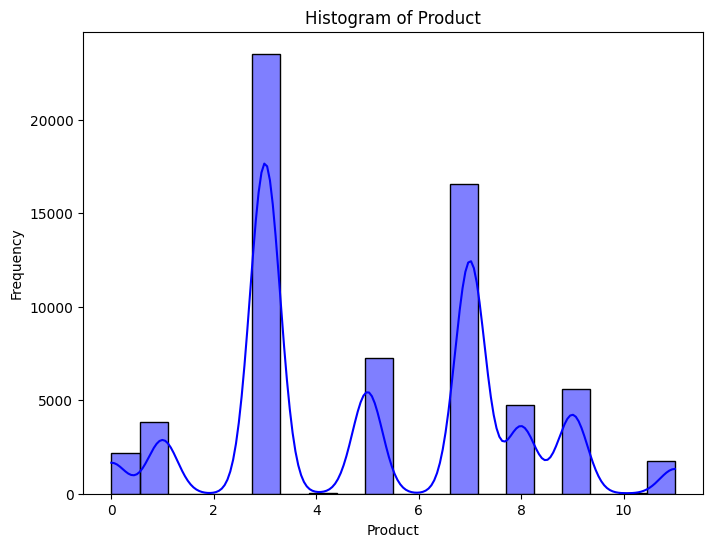

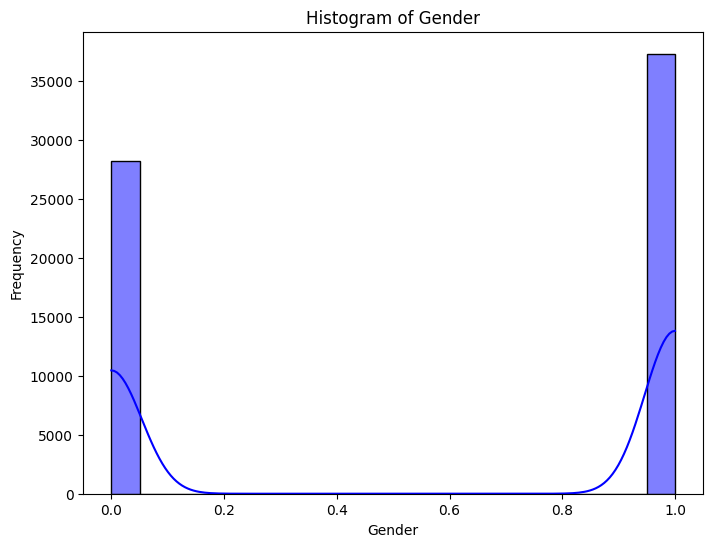

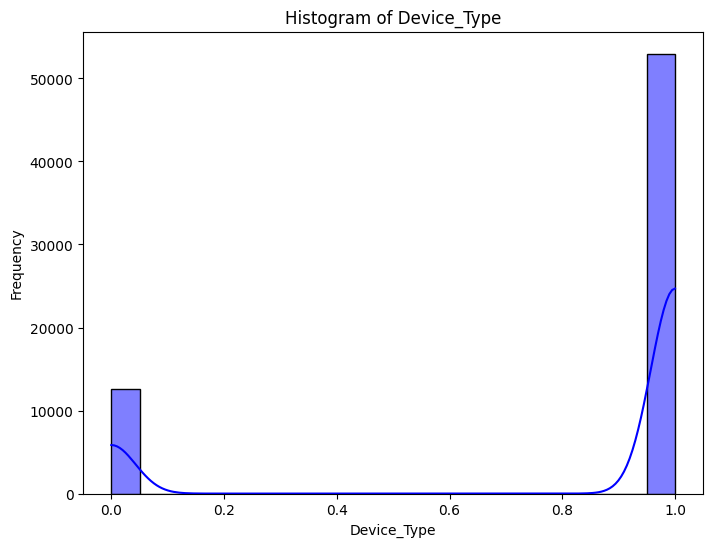

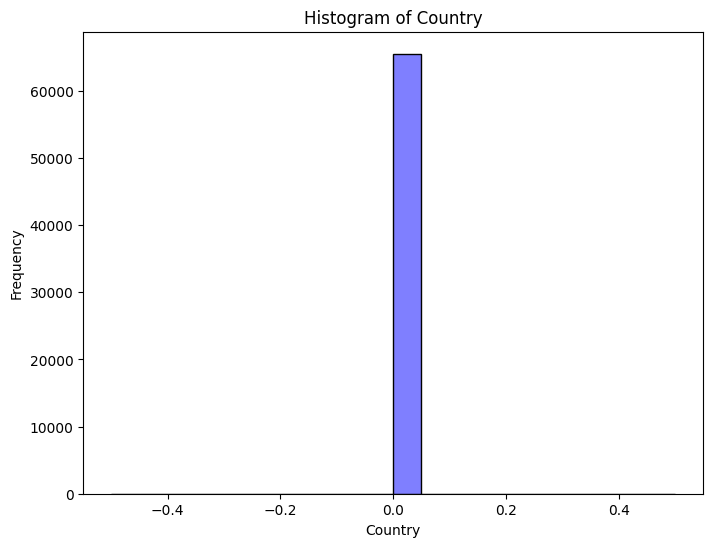

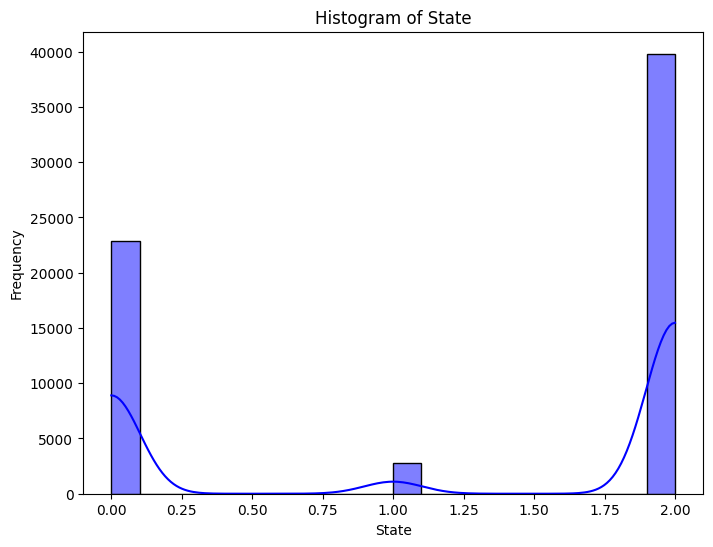

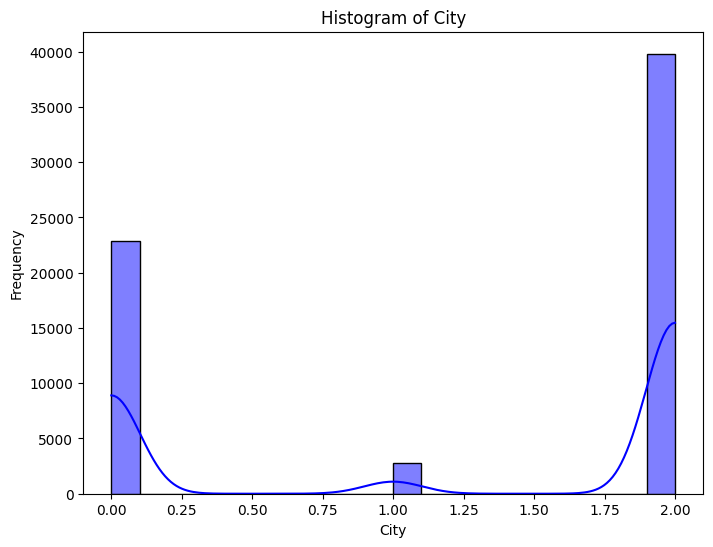

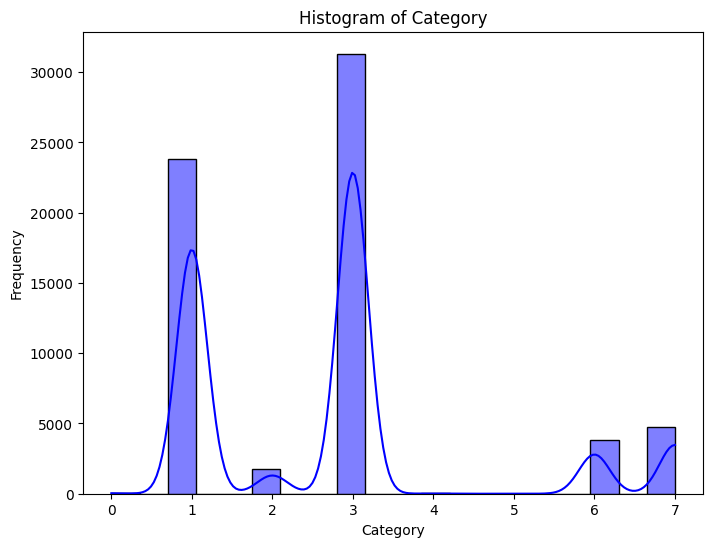

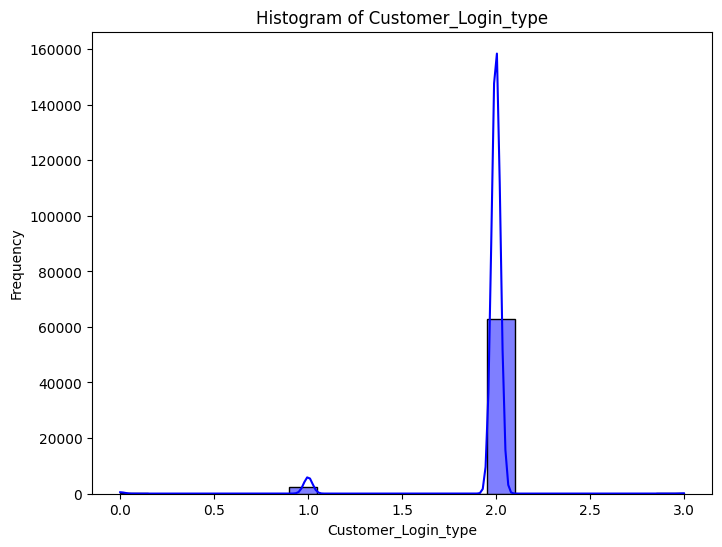

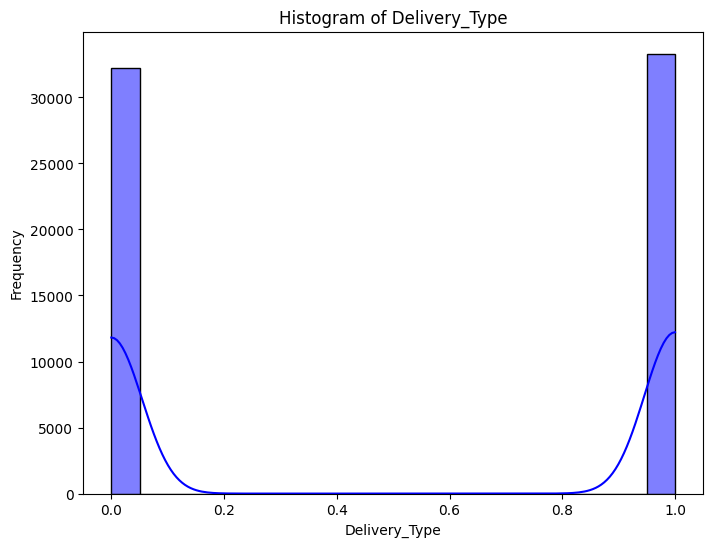

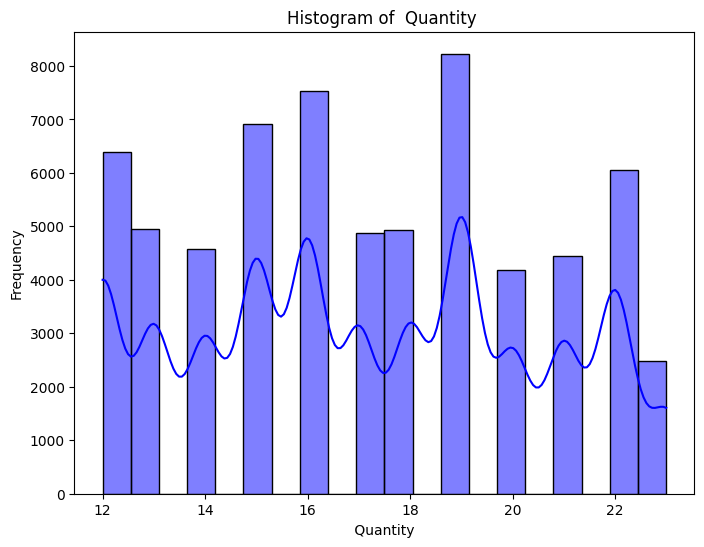

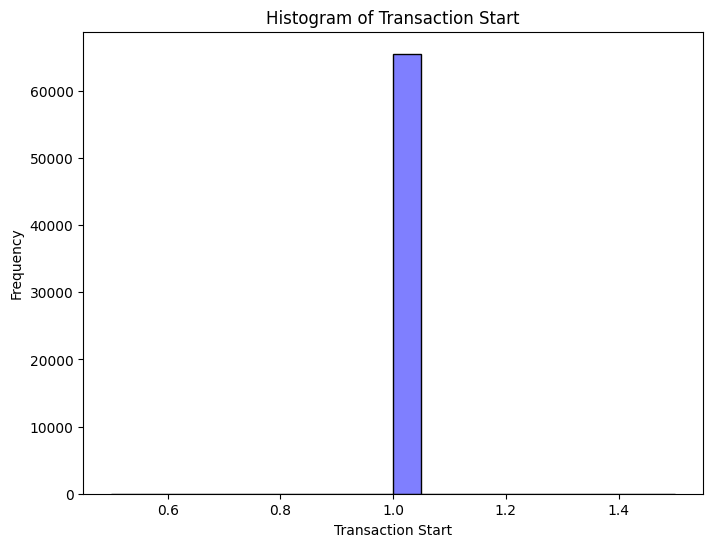

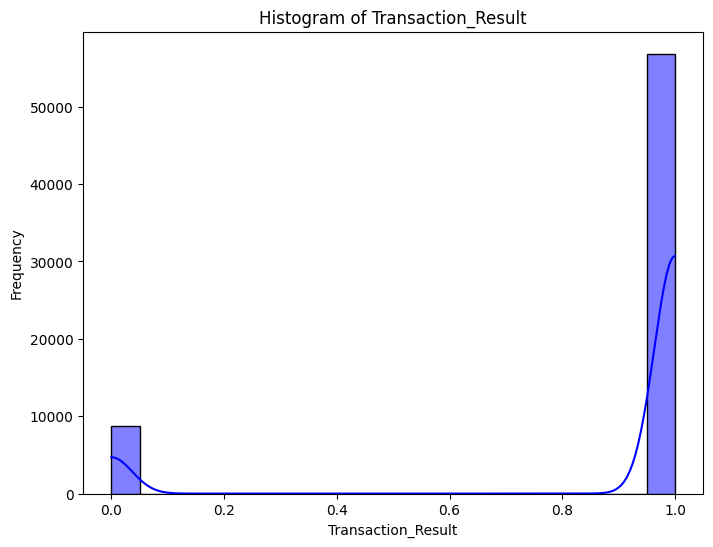

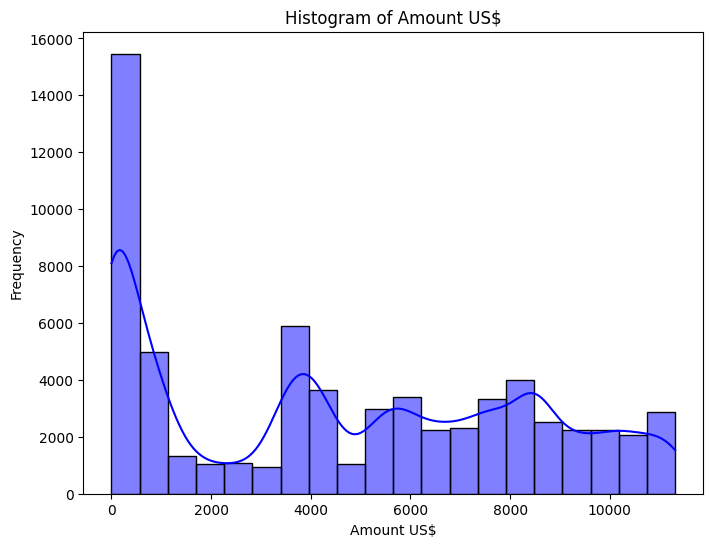

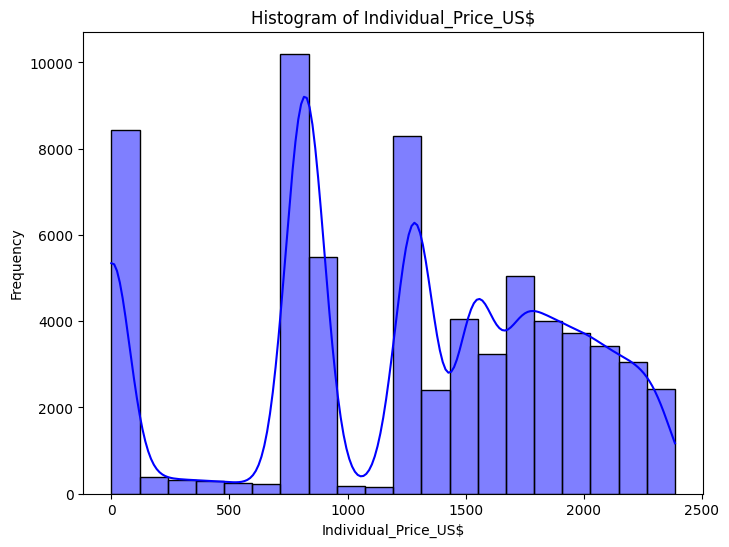

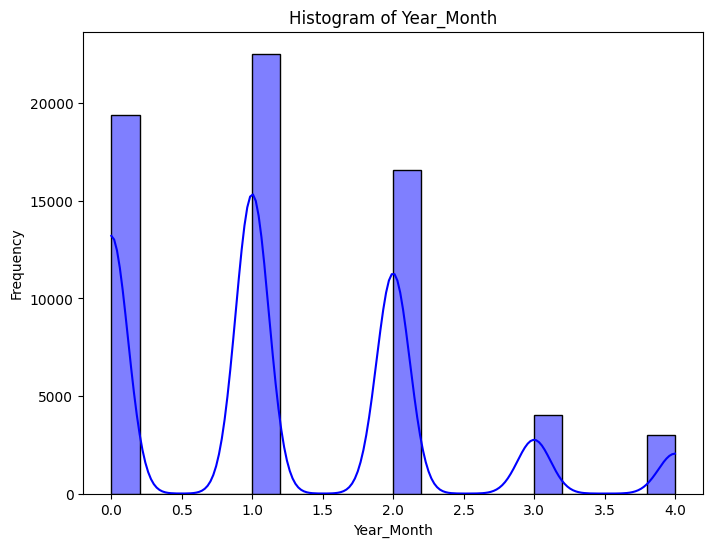

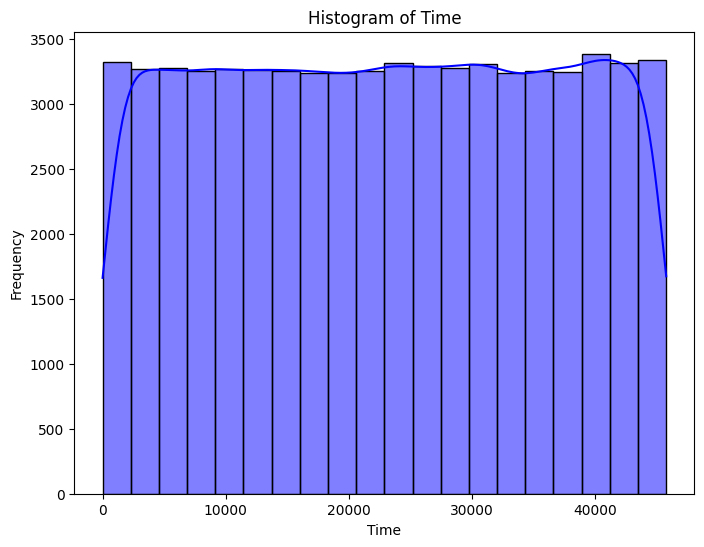

In [26]:
import seaborn as sns

# Histograms of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='blue', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

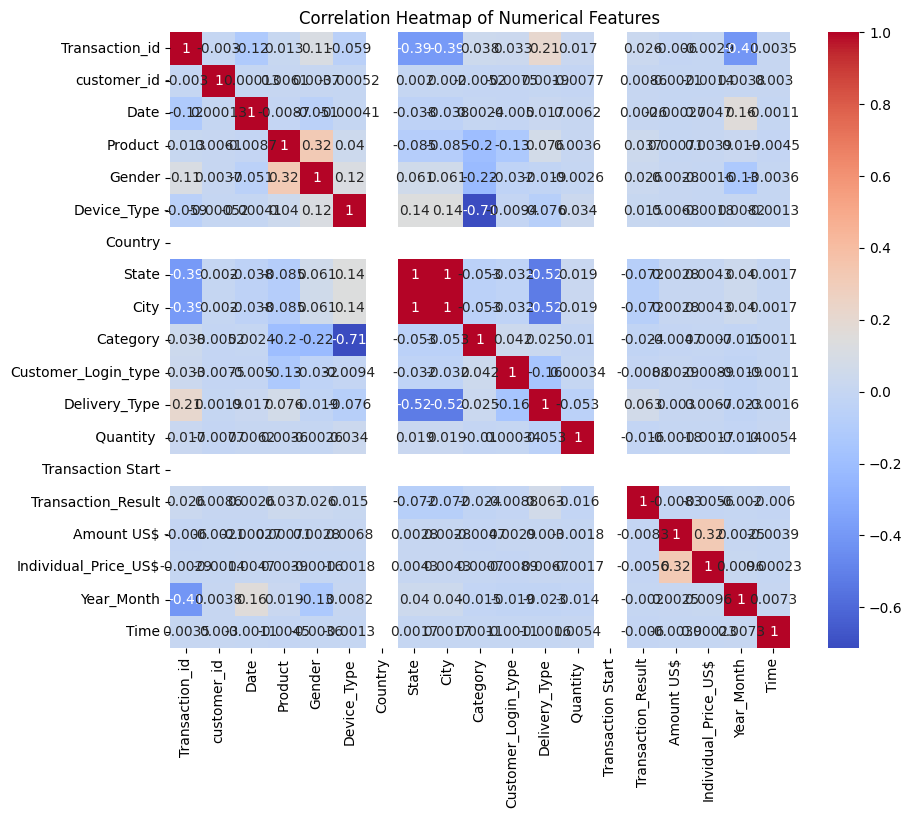

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [3]:

# Encode all categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])


In [4]:

# Feature selection
# Exclude irrelevant columns like Transaction_id, customer_id, Date, Product
X = df.drop(['Transaction_id', 'customer_id', 'Date', 'Product', 'Time'], axis=1)
y = df['Category']  # Target variable is 'Category'

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Model selection and training
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [14]:
# Model evaluation
# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)


Logistic Regression Accuracy: 0.8142214084077211


In [22]:
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)

Decision Tree Accuracy: 1.0


In [10]:
# Random Forest
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.999847409781033


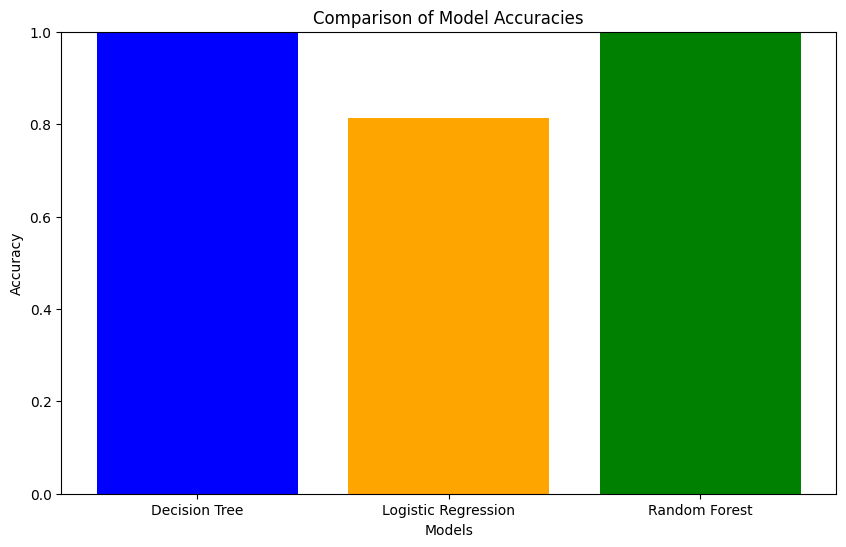

In [25]:
# Plotting
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_decision_tree, accuracy_log_reg, accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix and Classification Report for Decision Tree
print("Decision Tree:")
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print("Confusion Matrix:")
print(conf_matrix_decision_tree)
print("\nClassification Report:")
print(class_report_decision_tree)

# Confusion Matrix and Classification Report for Logistic Regression
print("\nLogistic Regression:")
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("\nClassification Report:")
print(class_report_log_reg)

# Confusion Matrix and Classification Report for Random Forest
print("\nRandom Forest:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)


Decision Tree:
Confusion Matrix:
[[   9    0    0    0    0    0    0]
 [   0 4685    0    0    0    0    0]
 [   0    0  354    0    0    0    0]
 [   0    0    0 6325    0    0    0]
 [   0    0    0    0    3    0    0]
 [   0    0    0    0    0  777    0]
 [   0    0    0    0    0    0  954]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00      4685
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00      6325
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00       777
           7       1.00      1.00      1.00       954

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107


Logistic Regression:
Confusion Matrix:
[[   0    9    0    0    0    0    0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


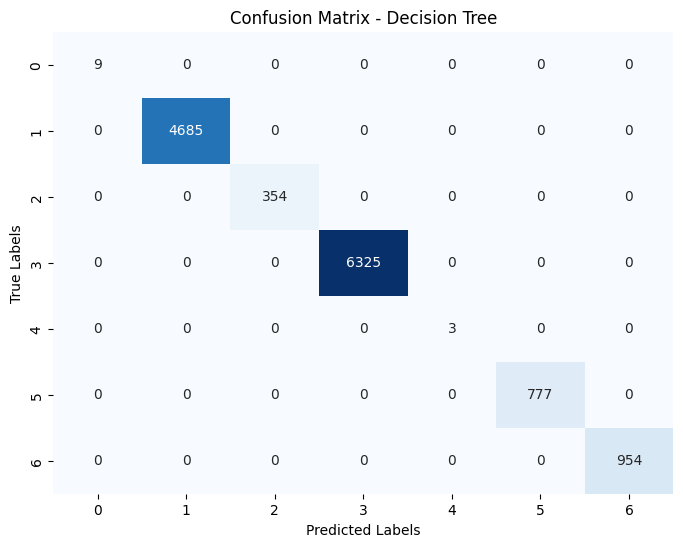

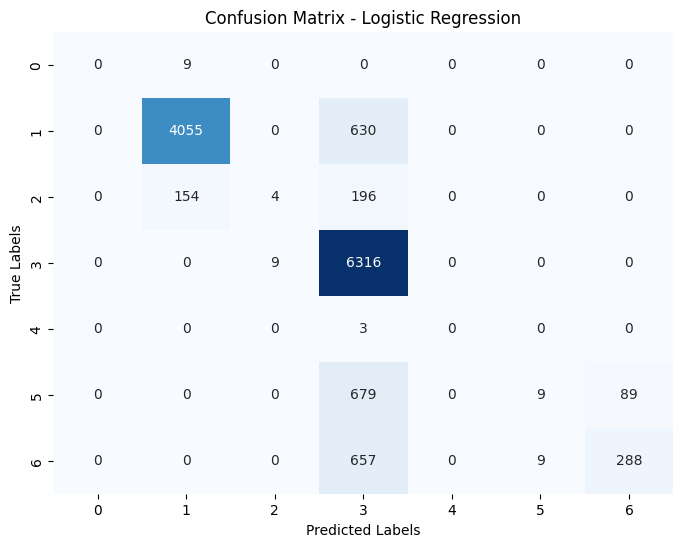

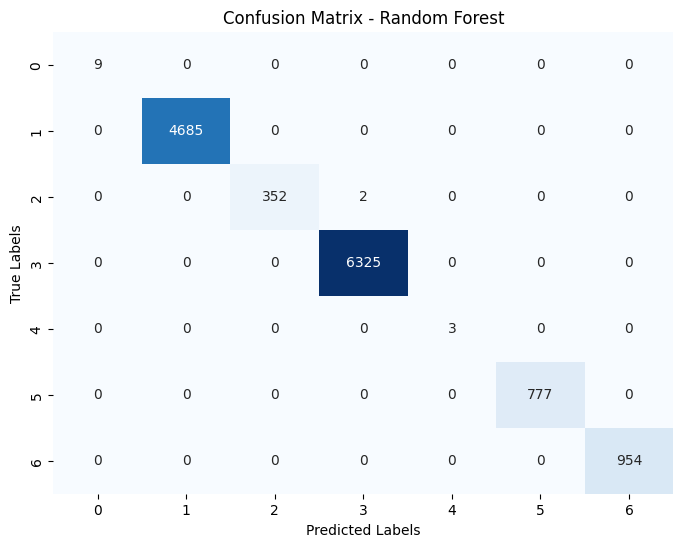

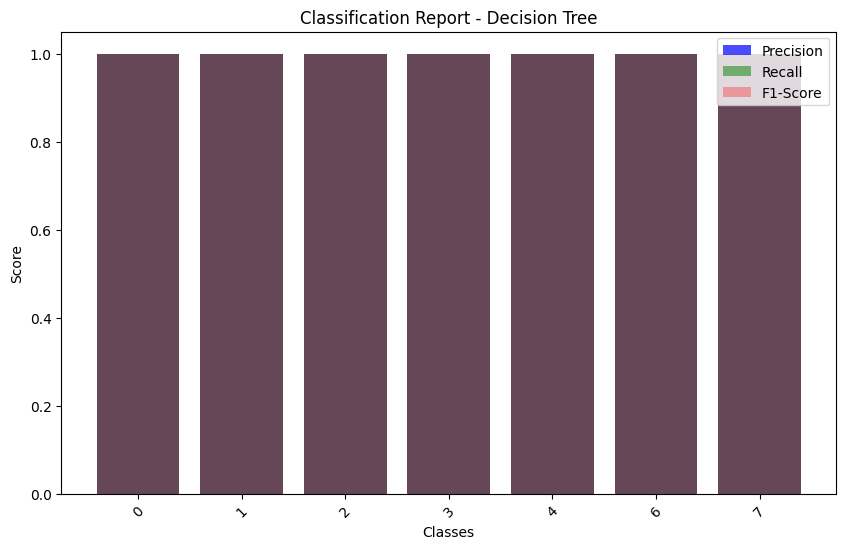

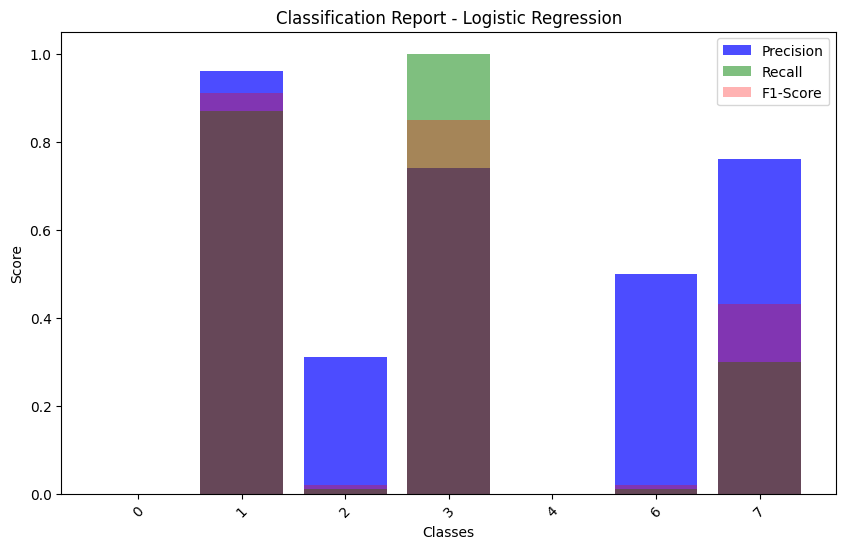

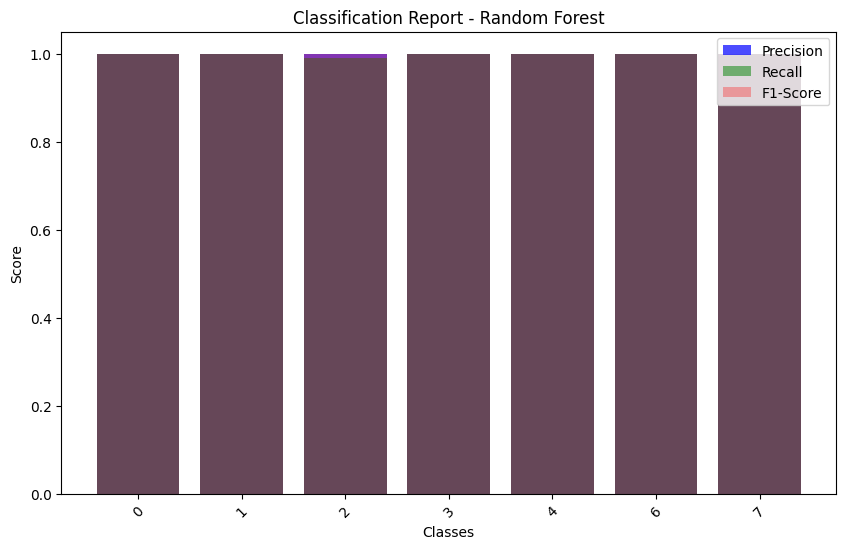

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(conf_matrix_decision_tree, 'Confusion Matrix - Decision Tree')

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(conf_matrix_log_reg, 'Confusion Matrix - Logistic Regression')

# Plot confusion matrix for Random Forest
plot_confusion_matrix(conf_matrix_rf, 'Confusion Matrix - Random Forest')

# Function to plot classification report
def plot_classification_report(class_report, title):
    precision = []
    recall = []
    f1_score = []
    support = []
    labels = []
    lines = class_report.split('\n')
    for line in lines[2:-5]:  # Exclude the first two lines and the last three lines
        row = line.split()
        labels.append(row[0])
        precision.append(float(row[1]))
        recall.append(float(row[2]))
        f1_score.append(float(row[3]))
        support.append(int(row[4]))

    plt.figure(figsize=(10, 6))
    plt.bar(labels, precision, color='blue', alpha=0.7, label='Precision')
    plt.bar(labels, recall, color='green', alpha=0.5, label='Recall')
    plt.bar(labels, f1_score, color='red', alpha=0.3, label='F1-Score')
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Plot classification report for Decision Tree
plot_classification_report(class_report_decision_tree, 'Classification Report - Decision Tree')

# Plot classification report for Logistic Regression
plot_classification_report(class_report_log_reg, 'Classification Report - Logistic Regression')

# Plot classification report for Random Forest
plot_classification_report(class_report_rf, 'Classification Report - Random Forest')
